# Misc. Plots Tips

A few tips that can be useful when making plots with matplotlib

## Trim Figure

Sometimes the plot is way smaller than the chosen figure size. When saving a figure to disk, using the *figure.savefig*, a good idea is to use *bbox_inches='tight'* to start with and adding *pad_inches=0* to remove the rest of the space.

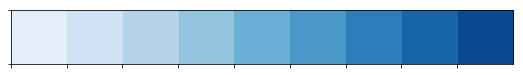

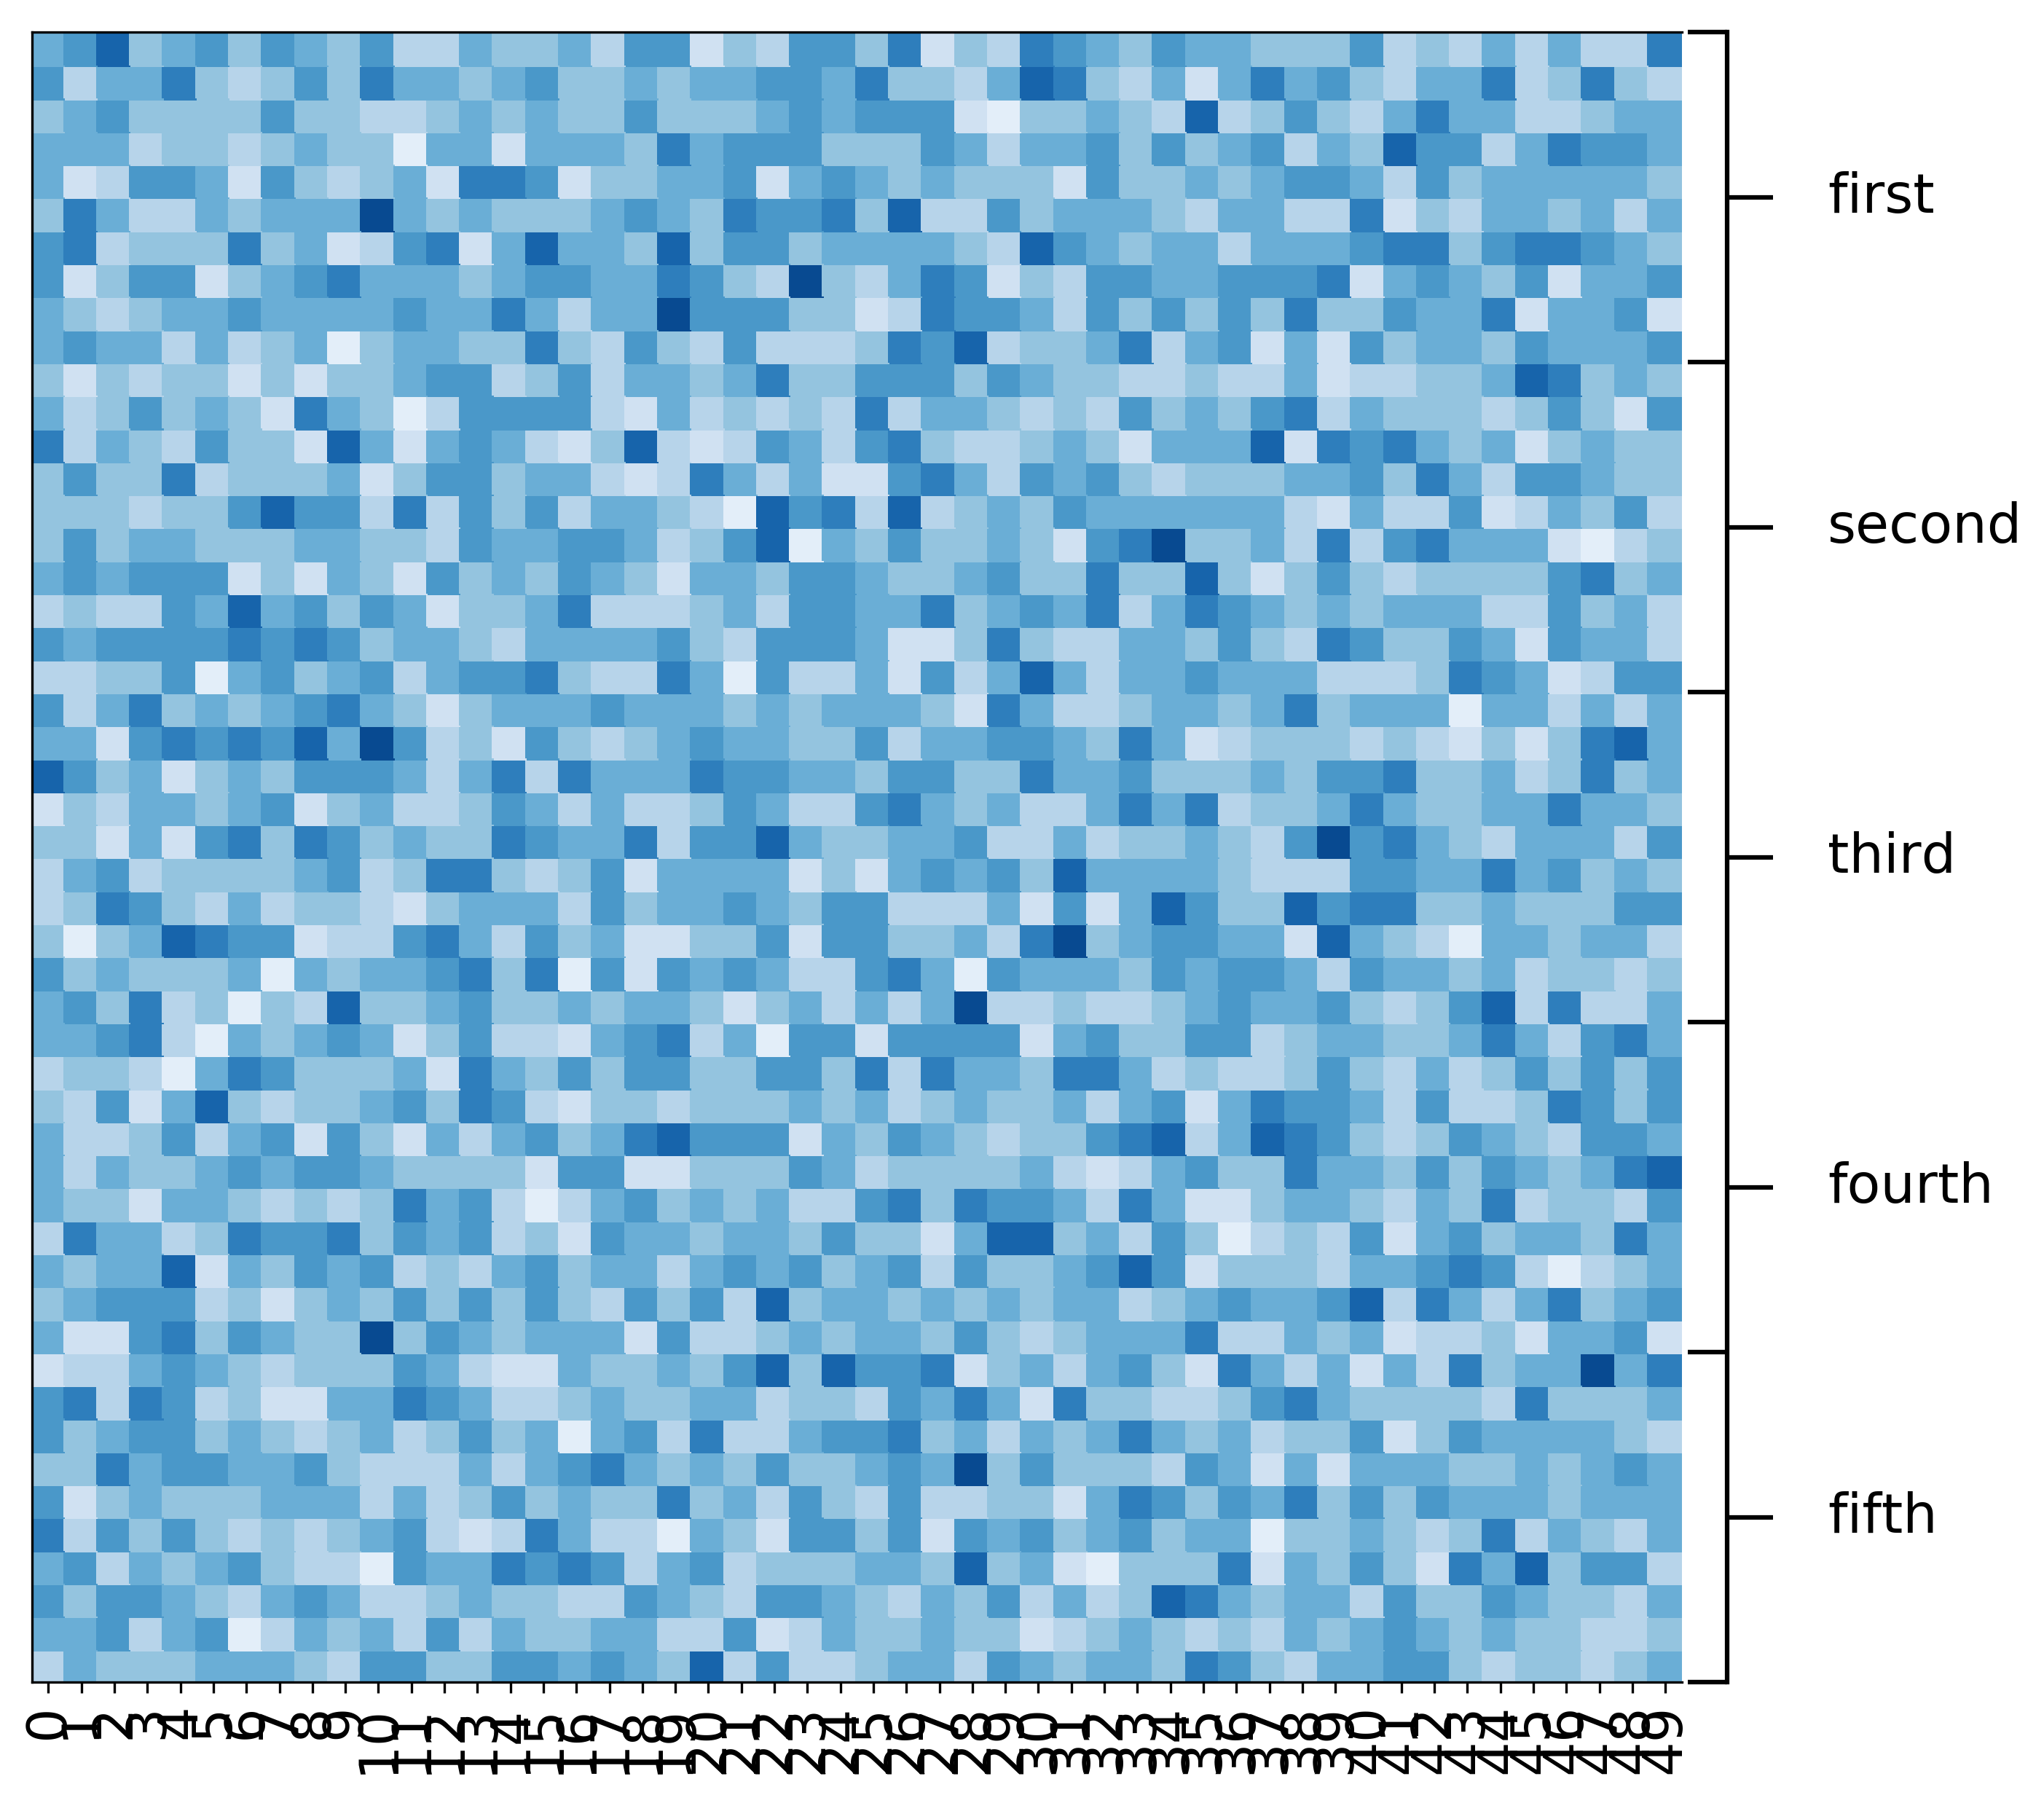

In [2]:
import mgkit.plots
import numpy
import pandas
import seaborn as sns
import matplotlib.colors
nrow = 50
ncol = nrow

data = pandas.DataFrame(
{
    x: numpy.random.negative_binomial(500, 0.5, nrow)
    for x in xrange(ncol)
}
)
sns.palplot(sns.color_palette('Blues', 9))
cmap = matplotlib.colors.ListedColormap(sns.color_palette('Blues', 9))

fig, ax = mgkit.plots.get_single_figure(figsize=(20,10), aspect='equal')
mgkit.plots.heatmap.baseheatmap(data.loc[data.index[::-1]], ax, cmap=cmap)
mgkit.plots.grouped_spine(
    [range(10), range(10, 20), range(20, 30), range(30, 40), range(40, 50)][::-1], 
    ['first', 'second', 'third', 'fourth', 'fifth'][::-1],
    ax
)
# This will save the figure "as is"
fig.savefig('test-trim.pdf')
# This will save the figure removing most of the unused space
fig.savefig('test-trim-tight.pdf', bbox_inches='tight')